# HT 1. Análisis Exploratorio y Regresión Lineal

#### Gabriel Vicente 20498 y Oscar Lopez 20679


#### Parte 1 – Análisis exploratorio de datos
##### Exploración rápida de los datos

In [102]:
from quickda.explore_numeric_categoric import *
# from pandas_profiling import ProfileReport
from quickda.explore_time_series import *
from quickda.explore_categoric import *
from quickda.explore_numeric import *
from quickda.explore_data import *
from quickda.clean_data import *
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

In [103]:
partidos = pd.read_csv('./baseball_reference_2016_scrape.csv')

In [104]:
profile = ProfileReport(partidos)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [105]:
explore(partidos, method="summarize")

c:\Users\charl\AppData\Local\Programs\Python\Python310\lib\site-packages\quickda\explore_data.py:26: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.

c:\Users\charl\AppData\Local\Programs\Python\Python310\lib\site-packages\quickda\explore_data.py:30: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



,dtypes,count,null_sum,null_pct,nunique,min,25%,50%,75%,max,mean,median,std,skew
attendance,object,2463,0,0.000,2377,"10,068']",-,-,-,U.S. Cellular Field'],-,-,-,-
away_team,object,2463,0,0.000,30,Arizona Diamondbacks,-,-,-,Washington Nationals,-,-,-,-
away_team_errors,int64,2463,0,0.000,6,0,0.0,0.0,1.0,5,0.580593,0.0,0.793391,1.455882
away_team_hits,int64,2463,0,0.000,22,1,6.0,8.0,11.0,22,8.764515,8.0,3.511581,0.513821
away_team_runs,int64,2463,0,0.000,20,0,2.0,4.0,6.0,21,4.413723,4.0,3.104556,0.939259
boxscore_url,object,2463,0,0.000,2463,https://www.baseball-reference.com/boxes/ANA/A...,-,-,-,https://www.baseball-reference.com/boxes/WAS/W...,-,-,-,-
date,object,2463,0,0.000,203,"Friday, April 15, 2016",-,-,-,"Wednesday, September 7, 2016",-,-,-,-
field_type,float64,0,2463,1.000,0,-,-,-,-,-,-,-,-,-
game_duration,object,2463,0,0.000,169,: 1:15,-,-,-,"Day Game, on grass",-,-,-,-
game_type,object,2460,3,0.001,4,-,-,-,-,-,-,-,-,-


In [106]:
partidos.head()

,attendance,away_team,away_team_errors,away_team_hits,away_team_runs,boxscore_url,date,field_type,game_duration,game_type,home_team,home_team_errors,home_team_hits,home_team_runs,other_info_string,start_time,venue
0,"40,030']",New York Mets,1,7,3,https://www.baseball-reference.com/boxes/KCA/K...,"Sunday, April 3, 2016",NaN,: 3:13,"Night Game, on grass",Kansas City Royals,0,9,4,"<!-- \n <div class=""section_content"" id=""d...",Start Time: 7:38 p.m. Local,: Kauffman Stadium
1,"21,621']",Philadelphia Phillies,0,5,2,https://www.baseball-reference.com/boxes/CIN/C...,"Wednesday, April 6, 2016",NaN,: 2:23,"Night Game, on grass",Cincinnati Reds,0,8,3,"<!-- \n <div class=""section_content"" id=""d...",Start Time: 7:11 p.m. Local,: Great American Ball Park
2,"12,622']",Minnesota Twins,0,5,2,https://www.baseball-reference.com/boxes/BAL/B...,"Wednesday, April 6, 2016",NaN,: 3:11,"Night Game, on grass",Baltimore Orioles,0,9,4,"<!-- \n <div class=""section_content"" id=""d...",Start Time: 7:07 p.m. Local,: Oriole Park at Camden Yards
3,"18,531']",Washington Nationals,0,8,3,https://www.baseball-reference.com/boxes/ATL/A...,"Wednesday, April 6, 2016",NaN,: 2:53,"Night Game, on grass",Atlanta Braves,1,8,1,"<!-- \n <div class=""section_content"" id=""d...",Start Time: 7:10 p.m. Local,: Turner Field
4,"18,572']",Colorado Rockies,1,8,4,https://www.baseball-reference.com/boxes/ARI/A...,"Wednesday, April 6, 2016",NaN,: 2:39,"Day Game, on grass",Arizona Diamondbacks,0,8,3,"<!-- \n <div class=""section_content"" id=""d...",Start Time: 12:40 p.m. Local,: Chase Field


In [107]:
partidos.tail()

,attendance,away_team,away_team_errors,away_team_hits,away_team_runs,boxscore_url,date,field_type,game_duration,game_type,home_team,home_team_errors,home_team_hits,home_team_runs,other_info_string,start_time,venue
2458,"31,042']",Toronto Blue Jays,2,7,5,https://www.baseball-reference.com/boxes/TBA/T...,"Sunday, April 3, 2016",NaN,: 2:51,"Day Game, on turf",Tampa Bay Rays,1,7,3,"<!-- \n <div class=""section_content"" id=""d...",Start Time: 4:09 p.m. Local,: Tropicana Field
2459,"39,500']",St. Louis Cardinals,0,5,1,https://www.baseball-reference.com/boxes/PIT/P...,"Sunday, April 3, 2016",NaN,: 3:02,"Day Game, on grass",Pittsburgh Pirates,1,9,4,"<!-- \n <div class=""section_content"" id=""d...",Start Time: 1:15 p.m. Local,: PNC Park
2460,"20,098']",San Francisco Giants,0,6,3,https://www.baseball-reference.com/boxes/MIL/M...,"Wednesday, April 6, 2016",NaN,: 3:19,"Day Game, on grass",Milwaukee Brewers,2,9,4,"<!-- \n <div class=""section_content"" id=""d...",Start Time: 12:41 p.m. Local,: Miller Park
2461,"17,883']",Detroit Tigers,0,13,7,https://www.baseball-reference.com/boxes/MIA/M...,"Wednesday, April 6, 2016",NaN,: 3:22,"Day Game, on grass",Miami Marlins,1,10,3,"<!-- \n <div class=""section_content"" id=""d...",Start Time: 4:57 p.m. Local,: Marlins Park
2462,"10,298']",Boston Red Sox,1,10,6,https://www.baseball-reference.com/boxes/CLE/C...,"Wednesday, April 6, 2016",NaN,: 3:29,"Night Game, on grass",Cleveland Indians,0,9,7,"<!-- \n <div class=""section_content"" id=""d...",Start Time: 6:22 p.m. Local,: Progressive Field


In [108]:
partidos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2463 entries, 0 to 2462
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   attendance         2463 non-null   object 
 1   away_team          2463 non-null   object 
 2   away_team_errors   2463 non-null   int64  
 3   away_team_hits     2463 non-null   int64  
 4   away_team_runs     2463 non-null   int64  
 5   boxscore_url       2463 non-null   object 
 6   date               2463 non-null   object 
 7   field_type         0 non-null      float64
 8   game_duration      2463 non-null   object 
 9   game_type          2460 non-null   object 
 10  home_team          2463 non-null   object 
 11  home_team_errors   2463 non-null   int64  
 12  home_team_hits     2463 non-null   int64  
 13  home_team_runs     2463 non-null   int64  
 14  other_info_string  2463 non-null   object 
 15  start_time         2463 non-null   object 
 16  venue              2463 

In [109]:
partidos.describe()

,away_team_errors,away_team_hits,away_team_runs,field_type,home_team_errors,home_team_hits,home_team_runs
count,2463.000000,2463.000000,2463.000000,0.0,2463.000000,2463.000000,2463.000000
mean,0.580593,8.764515,4.413723,NaN,0.585871,8.611855,4.519691
std,0.793391,3.511581,3.104556,NaN,0.805542,3.436965,3.111572
min,0.000000,1.000000,0.000000,NaN,0.000000,0.000000,0.000000
25%,0.000000,6.000000,2.000000,NaN,0.000000,6.000000,2.000000
50%,0.000000,8.000000,4.000000,NaN,0.000000,8.000000,4.000000
75%,1.000000,11.000000,6.000000,NaN,1.000000,11.000000,6.000000
max,5.000000,22.000000,21.000000,NaN,5.000000,22.000000,17.000000


##### Tipo de cada una de las variables del dataset

In [110]:
# Clasificación de las variables
data = {'Variable': ['away_team', 'boxscore_url', 'date', 'field_type', 'game_type', 'home_team', 'other_info_string', 'start_time', 'venue'] + 
        ['attendance','away_team_errors', 'away_team_hits', 'away_team_runs', 'home_team_errors', 'home_team_hits', 'home_team_runs'] + ['game_duration'], 
        'Type': ['Qualitative'] * 9 + ['Quantitative Discrete'] * 7 + ['Quantitative Continuous']}

df = pd.DataFrame(data)
print(df)

             Variable                     Type
0           away_team              Qualitative
1        boxscore_url              Qualitative
2                date              Qualitative
3          field_type              Qualitative
4           game_type              Qualitative
5           home_team              Qualitative
6   other_info_string              Qualitative
7          start_time              Qualitative
8               venue              Qualitative
9          attendance    Quantitative Discrete
10   away_team_errors    Quantitative Discrete
11     away_team_hits    Quantitative Discrete
12     away_team_runs    Quantitative Discrete
13   home_team_errors    Quantitative Discrete
14     home_team_hits    Quantitative Discrete
15     home_team_runs    Quantitative Discrete
16      game_duration  Quantitative Continuous


In [111]:
qualitative = [ 'away_team', 'boxscore_url', 'date', 'field_type', 'game_type', 'home_team', 'other_info_string', 'start_time', 'venue']
quantitative_discrete = ['attendance','away_team_errors', 'away_team_hits', 'away_team_runs', 'home_team_errors', 'home_team_hits', 'home_team_runs']
quantitative_continuous = ['game_duration']

to_categoric = ['away_team', 'boxscore_url', 'field_type', 'game_type', 'home_team', 'other_info_string', 'venue']
partidos = clean(partidos, method = 'dtypes', columns = to_categoric, dtype='category')

##### Gráficos exploratorios

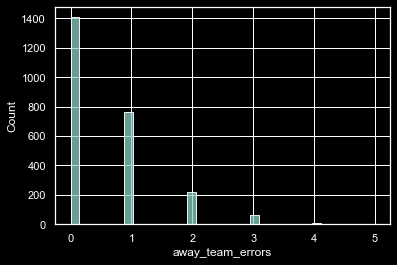

In [112]:
plt.style.use("dark_background")
sns.histplot(x="away_team_errors", data=partidos)
plt.show()

##### Aíslar las variables numéricas & Análisis de correlación

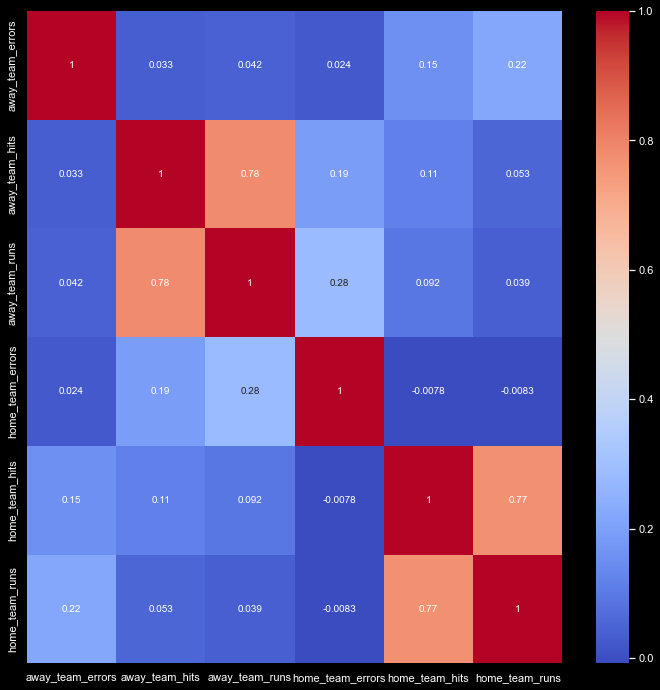

In [113]:
plt.style.use("dark_background")
numeric_vars = partidos.select_dtypes(include=["int64", "float64"])
categorical_vars = partidos.select_dtypes(exclude=["int64", "float64"])
corr = numeric_vars.corr()
plt.figure(figsize=(12,12))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.show()

##### Variables categóricas

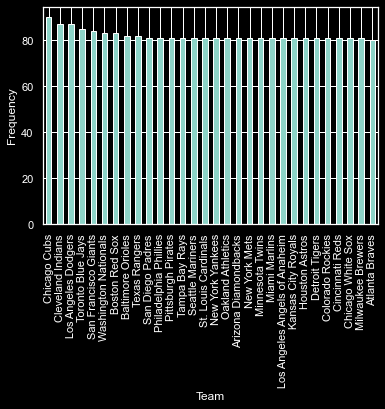

In [114]:
team_counts = partidos["away_team"].value_counts()
team_counts.plot(kind="bar")
plt.xlabel("Team")
plt.ylabel("Frequency")
plt.show()

##### Limpieza de variables

In [115]:
#Descartar field_type porque no posee datos
partidos = partidos.drop("field_type", axis=1)

In [116]:
import re

def extract_weather(other_info_string):
    weather_regex = re.compile(r"Start Time Weather:.*")
    weather = weather_regex.search(other_info_string)
    if weather:
        return weather.group().split(":")[1].strip()
    return None

partidos["start_time_weather"] = partidos["other_info_string"].apply(extract_weather)
partidos['start_time_weather'] = partidos['other_info_string'].str.extract(r'Start Time Weather:.*(\d+&deg; F.*)')
partidos['start_time_weather'] = partidos['start_time_weather'].str.replace(r'</strong>', '')
partidos['start_time_weather'] = partidos['start_time_weather'].str.replace(r'</div>', '')

In [117]:
#Descartar "other_info_string" porque no posee datos relevantes
partidos = partidos.drop("other_info_string", axis=1)

In [118]:
#Limpiar datos de attendance
partidos['attendance'] = partidos['attendance'].astype(str)
partidos['attendance'] = partidos['attendance'].str.replace(',', '')
partidos['attendance'] = partidos['attendance'].str.replace("']", '')
partidos['attendance'] = pd.to_numeric(partidos['attendance'], errors='coerce')
partidos.dropna(subset=['attendance'], inplace=True)
partidos['attendance'] = partidos['attendance'].astype(int)
print(partidos['attendance'])

0       40030
1       21621
2       12622
3       18531
4       18572
        ...  
2458    31042
2459    39500
2460    20098
2461    17883
2462    10298
Name: attendance, Length: 2460, dtype: int32


C:\Users\charl\AppData\Local\Temp\ipykernel_9172\875017132.py:4: FutureWarning:

The default value of regex will change from True to False in a future version.



In [119]:
#Limpiando veneu
partidos['venue'] = partidos['venue'].astype(str)
partidos['venue']= partidos['venue'].str.replace(': ', '')
partidos.dropna(subset=['venue'], inplace=True)
print(partidos['venue'])

0                  Kauffman Stadium
1          Great American Ball Park
2       Oriole Park at Camden Yards
3                      Turner Field
4                       Chase Field
                   ...             
2458                Tropicana Field
2459                       PNC Park
2460                    Miller Park
2461                   Marlins Park
2462              Progressive Field
Name: venue, Length: 2460, dtype: object


In [120]:
partidos.to_csv("nuevo_dataset.csv", index=False)